In [103]:
# !pip install --ignore-installed --upgrade tensorflow==2.12.0

In [104]:
!pip install keras

In [105]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [107]:
X_train=pd.read_csv(r"C:\Users\bouma\Downloads\archive\csvTrainImages 13440x1024.csv").to_numpy()
X_test=pd.read_csv(r"C:\Users\bouma\Downloads\archive\csvTestImages 3360x1024.csv").to_numpy()
y_train=pd.read_csv(r"C:\Users\bouma\Downloads\archive\csvTrainLabel 13440x1.csv").to_numpy()-1
y_test=pd.read_csv(r"C:\Users\bouma\Downloads\archive\csvTestLabel 3360x1.csv").to_numpy()-1

In [108]:
print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (13439, 1024)
The shape of X_test is:  (3359, 1024)
The shape of y_train is:  (13439, 1)
The shape of y_test is:  (3359, 1)


In [109]:
# channels=depth of the image
# depth=1 for grayscale, because there is only one color channel and 3 for RGB color images.


X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [110]:
print('The shape of X_train after reshape is: ',X_train.shape)
print('The shape of X_test after reshape is: ',X_test.shape)
print('The shape of y_train after reshape is: ',y_train.shape)
print('The shape of y_test after reshape is: ',y_test.shape)

The shape of X_train after reshape is:  (13439, 32, 32, 1)
The shape of X_test after reshape is:  (3359, 32, 32, 1)
The shape of y_train after reshape is:  (13439, 1)
The shape of y_test after reshape is:  (3359, 1)


In [111]:
# converting the numerical labels in y_train and y_test into this one-hot encoded format.
# One-hot encoding: converting the numerical labels into a binary matrix where only one element is set to 1 (hot) and the rest are set to 0 (cold). 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [112]:
print('y_train shape after hot-encoding is: ',y_train.shape)
print('y_test shape after hot-encoding is: ',y_test.shape)

y_train shape after hot-encoding is:  (13439, 28)
y_test shape after hot-encoding is:  (3359, 28)


In [113]:
gen=ImageDataGenerator(zoom_range=0.3 ,rescale=1.0/255.0,horizontal_flip=True)
train_data=gen.flow(X_train, y_train,)

In [114]:
from tensorflow.keras.layers import Input
model = Sequential([
    Input(shape=(32, 32, 1)), 
    Conv2D(32, 3, padding='same', activation='relu'),  
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


In [115]:
reduce=ReduceLROnPlateau(factor=0.03,min_lr=0.000001)
# Factor=0.03 ==> The learning rate will be reduced to 3% of its current value when the metric stops improving.
# min_lr ==> The lower bound on the learning rate: No matter how many times the learning rate is reduced, it will not go below 0.000001.
# New learning rate = current learning rate * factor. 

callbacks=[reduce]

In [116]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,580 (935.86 KB)

 Trainable params: 239,580 (935.86 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.fit(train_data,
          epochs=30,
          validation_data=(X_test,y_test),
          callbacks=callbacks)


Epoch 1/30
 10/420 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0232 - loss: 3.3338

C:\Users\bouma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.1676 - loss: 2.7001 - val_accuracy: 0.3962 - val_loss: 245.6259 - learning_rate: 0.0010
Epoch 2/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5701 - loss: 1.1904 - val_accuracy: 0.5901 - val_loss: 199.7007 - learning_rate: 0.0010
Epoch 3/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7031 - loss: 0.8278 - val_accuracy: 0.7279 - val_loss: 113.5153 - learning_rate: 0.0010
Epoch 4/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7844 - loss: 0.6320 - val_accuracy: 0.7502 - val_loss: 141.5470 - learning_rate: 0.0010
Epoch 5/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8367 - loss: 0.4876 - val_accuracy: 0.8029 - val_loss: 96.6084 - learning_rate: 0.0010
Epoch 6/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8542 - loss: 0.4247 - val_accuracy: 0.7669 - val_loss: 120.1193 - learning_rate: 0.0010
Epoch 7/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8743 - loss: 0.

In [119]:
history_df=pd.DataFrame(model.history.history)
history_df


,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.304487,2.112321,0.396249,245.625946,1.000000e-03
1,0.609867,1.076952,0.590057,199.700729,1.000000e-03
2,0.732718,0.757822,0.727895,113.515327,1.000000e-03
3,0.795223,0.592704,0.750223,141.546982,1.000000e-03
4,0.837116,0.484657,0.802918,96.608383,1.000000e-03
5,0.853486,0.421901,0.766895,120.119270,1.000000e-03
6,0.877074,0.361785,0.730277,167.104538,1.000000e-03
7,0.892328,0.319948,0.820482,108.048309,1.000000e-03
8,0.897611,0.300843,0.884192,71.578003,1.000000e-03
9,0.905945,0.276943,0.779399,161.671463,1.000000e-03


<Axes: >

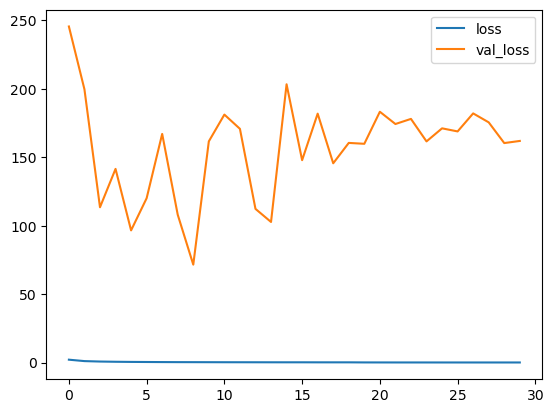

In [120]:
history_df[['loss','val_loss']].plot()


In [121]:
# Training loss is close to zero, and the validation loss is very high==> maybe there is an overfitting. 
# It's memorizing the training data rather than learning generalizable patterns.

<Axes: >

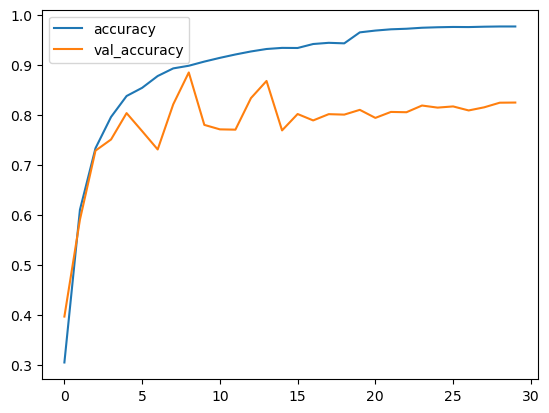

In [122]:
history_df[['accuracy','val_accuracy']].plot()


In [123]:
model.evaluate(X_test,y_test)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8316 - loss: 153.2516


[161.9725799560547, 0.8240547776222229]

In [124]:
predict=model.predict(X_test)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [125]:
x=np.argmax(predict[3307]) 

if(x==1):
    print("الف")
elif(x==2):
    print("باء")
elif(x==3):
    print("تاء")
elif(x==4):
    print("ثاء")
elif(x==5):
    print("جيم") 
elif(x==6):
    print("حاء")
elif(x==7):
    print("خاء")
elif(x==8):
    print("دال")
elif(x==9):
    print("ذال")
elif(x==10):
    print("راء")
elif(x==11):
    print("زين")
elif(x==12):
    print("سين")
elif(x==13):
    print("شين")
elif(x==14):
    print("صاد")
elif(x==15):
    print("ضاد")
elif(x==16):
    print("طاء")
elif(x==17):
    print("ظاء")
elif(x==18):
    print("عين")
elif(x==19):
    print("غين")
elif(x==20):
    print("فاء")
elif(x==21):
    print("قاف")
elif(x==22):
    print("كاف")
elif(x==23):
    print("لام")
elif(x==24):
    print("ميم") 
elif(x==25):
    print("نون")
elif(x==26):
    print("هاء")
elif(x==27):
    print("واو")
elif(x==28):
    print("ياء")   
else :
    # print("لا اعلم ما هذ الحرف!")
    print('Undefined Letter')

باء


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


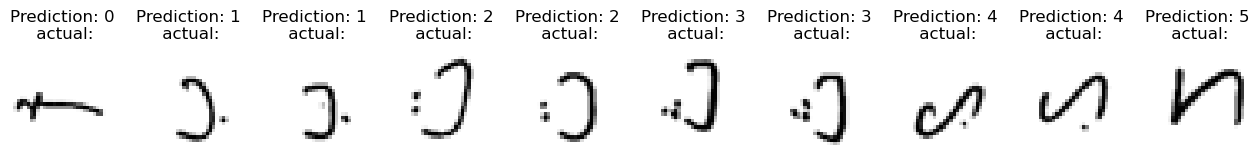

In [126]:
pred=model.predict(X_test)
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,X_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n actual:')

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[1],predict[1])

array([[27,  0],
       [ 0,  1]], dtype=int64)

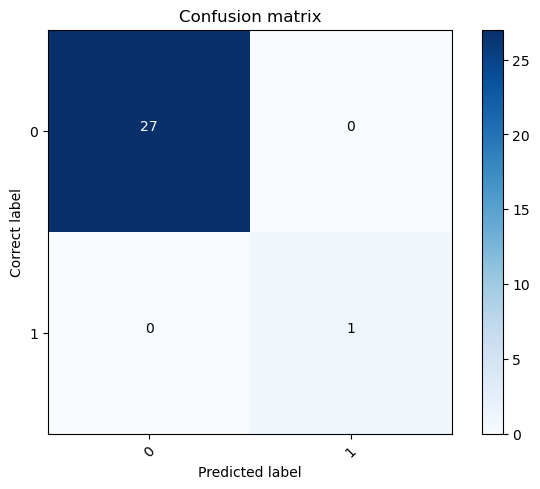

In [128]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Correct label')
    plt.xlabel('Predicted label')
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test[0],predict[0])
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [129]:
 # correctly predicted most of the negative cases (27 out of 27) and the one positive case without any false positives or false negatives.

In [130]:
model.save('IS_CODE.keras')


In [131]:
%pwd


'C:\\Users\\bouma'

In [132]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [133]:
import tensorflow as tf

# Save the model in the SavedModel format
model_save_path = r'C:\Users\bouma\Downloads\Intermediate_code\Models\my_model'
tf.saved_model.save(model, model_save_path)

# Delete optimizer-related files
import os
optimizer_files = [f for f in os.listdir(model_save_path) if 'optimizer' in f]
for file in optimizer_files:
    os.remove(os.path.join(model_save_path, file))

model.save(r'C:/Users/bouma/Downloads/Intermediate_code/Models/IS_THE_arabic_handwriting_model.h5')






In [134]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model(r'C:/Users/bouma/Downloads/Intermediate_code/Models/IS_THE_arabic_handwriting_model.h5')



In [137]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


105/105 - 1s - 10ms/step - accuracy: 0.8241 - loss: 161.9726
Test accuracy: 82.41%
